# Print All Scalling Techniques

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  
from sklearn import metrics
import autosklearn.classification

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("multiclass.csv", low_memory=True, sep=",")

For Scaler = MinMaxScaler
Accuracy: 0.8949843260188087
------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.92      0.97      0.95       497
         2.0       0.71      0.56      0.62        88
         3.0       0.88      0.72      0.79        53

    accuracy                           0.89       638
   macro avg       0.84      0.75      0.79       638
weighted avg       0.89      0.89      0.89       638

------------------------------------------------------
MCC: 0.6949692595512681
------------------------------------------------------
Kappa: 0.6886013797524605
------------------------------------------------------
For Scaler = StandardScaler
Accuracy: 0.9075235109717869
------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.72      0.68      0.70        88
         3.0       

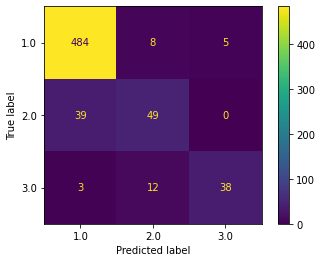

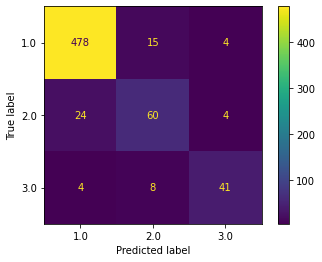

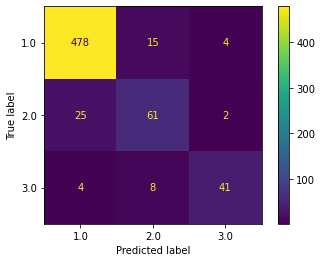

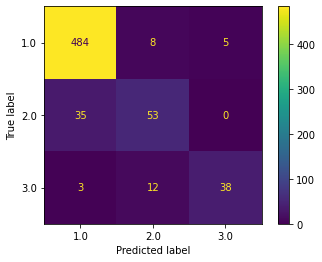

In [6]:
y = df['Your_Target']
X = df.drop("Your_Target", axis=1)

arr = (MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler)

# scaler = RobustScaler()


for scaler in arr :
    X = scaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("For Scaler = " + str(scaler.__name__))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------------------")
    print("MCC:",matthews_corrcoef(y_test, y_pred))
    print("------------------------------------------------------")
    print("Kappa:",cohen_kappa_score(y_test, y_pred))
    print("------------------------------------------------------")
    plot_confusion_matrix(model, X_test, y_test)

# Auto Best Scalling Technique

Best Scaler = RobustScaler
------------------------------------------------------
Accuracy: 0.9090909090909091
------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.73      0.69      0.71        88
         3.0       0.87      0.77      0.82        53

    accuracy                           0.91       638
   macro avg       0.85      0.81      0.83       638
weighted avg       0.91      0.91      0.91       638

------------------------------------------------------
MCC: 0.7458494162402912
------------------------------------------------------
Kappa: 0.7451199184471904
------------------------------------------------------


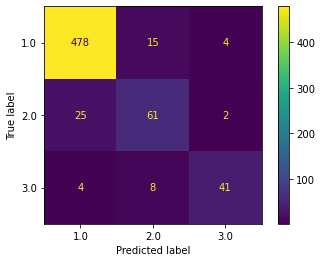

In [8]:
y = df['Your_Target']
X = df.drop("Your_Target", axis=1)

arr = (MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler)

best_accuracy = 0
best_classification = None
best_mcc = None
best_kappa = None
best_function_name = ''
best_model = None
best_X_test = None
best_Y_test = None

for scaler in arr :
    X = scaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    if best_accuracy < accuracy:
        best_accuracy = accuracy
        best_classification = classification
        best_mcc = mcc
        best_kappa = kappa
        best_function_name = str(scaler.__name__)
        best_model = model
        best_X_test = X_test
        best_Y_test = y_test
        
print("Best Scaler = " + best_function_name)
print("------------------------------------------------------")
print("Accuracy:", best_accuracy)
print("------------------------------------------------------")
print(best_classification)
print("------------------------------------------------------")
print("MCC:", best_mcc)
print("------------------------------------------------------")
print("Kappa:", best_kappa)
print("------------------------------------------------------")
plot_confusion_matrix(best_model, best_X_test, best_Y_test)